In [7]:
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
print(df.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


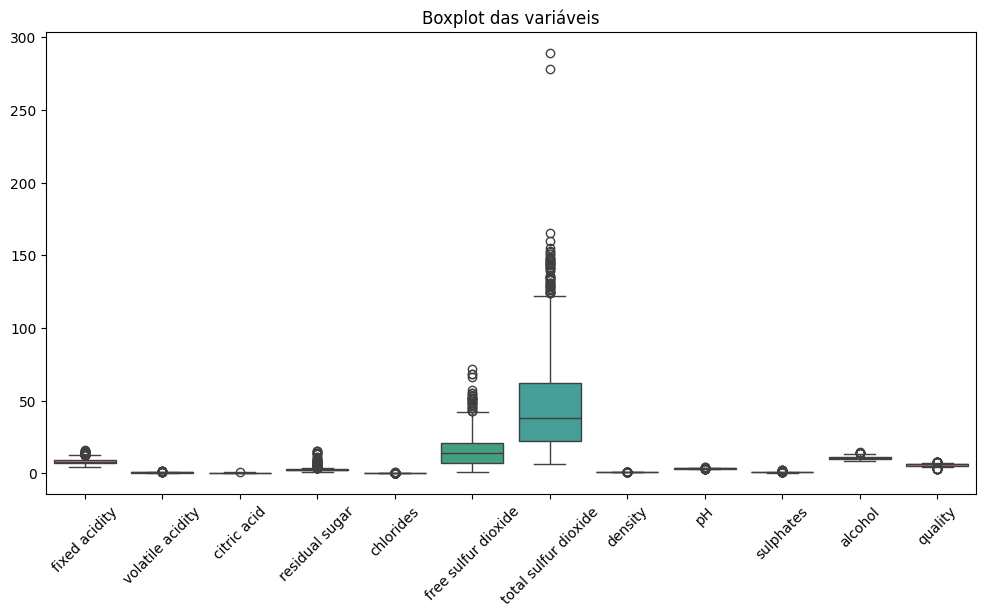

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para verificar outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot das variáveis")
plt.show()


In [10]:
# Exemplo para uma feature
Q1 = df['volatile acidity'].quantile(0.25)
Q3 = df['volatile acidity'].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR
df = df[(df['volatile acidity'] >= lim_inf) & (df['volatile acidity'] <= lim_sup)]


In [11]:
from sklearn.preprocessing import StandardScaler

X = df.drop('quality', axis=1)
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


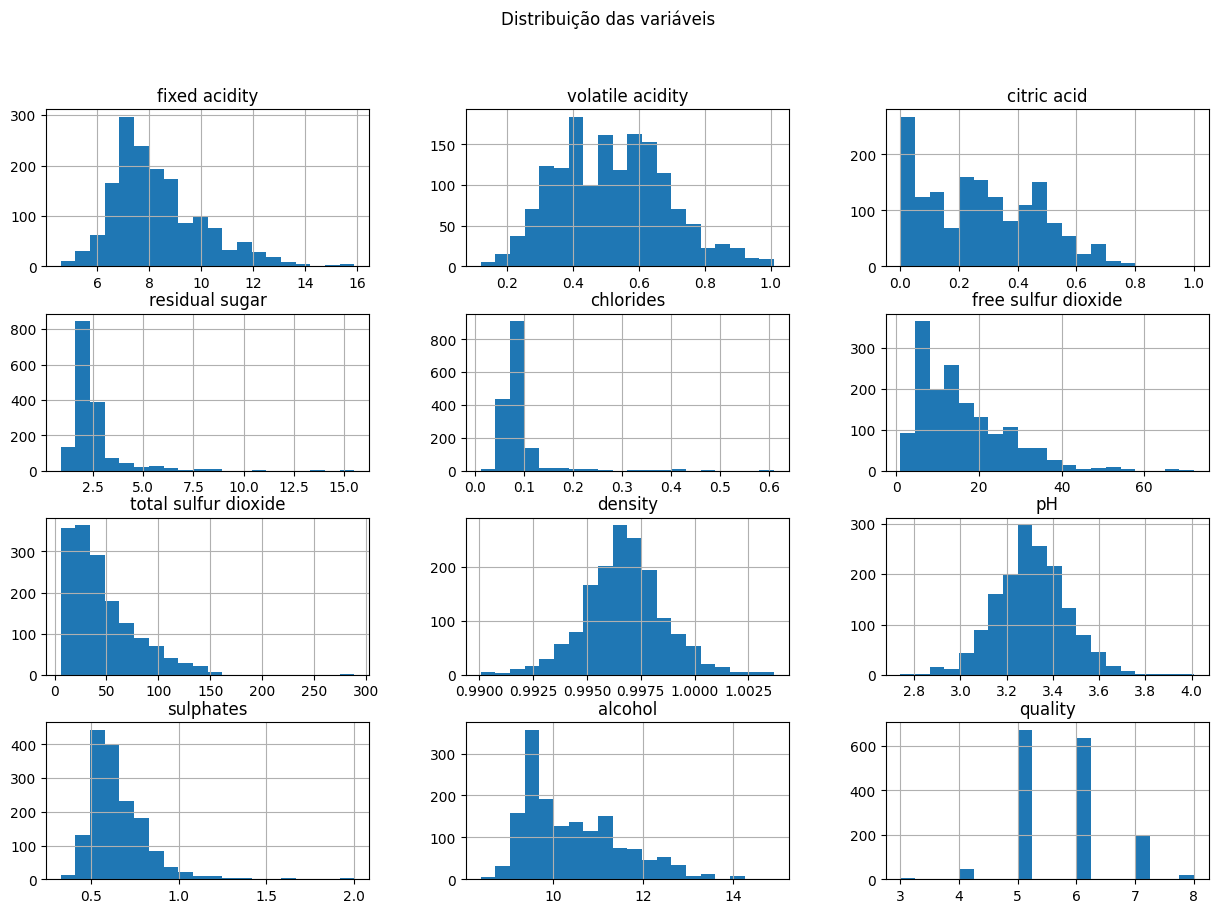

In [12]:
df.hist(bins=20, figsize=(15,10))
plt.suptitle("Distribuição das variáveis")
plt.show()


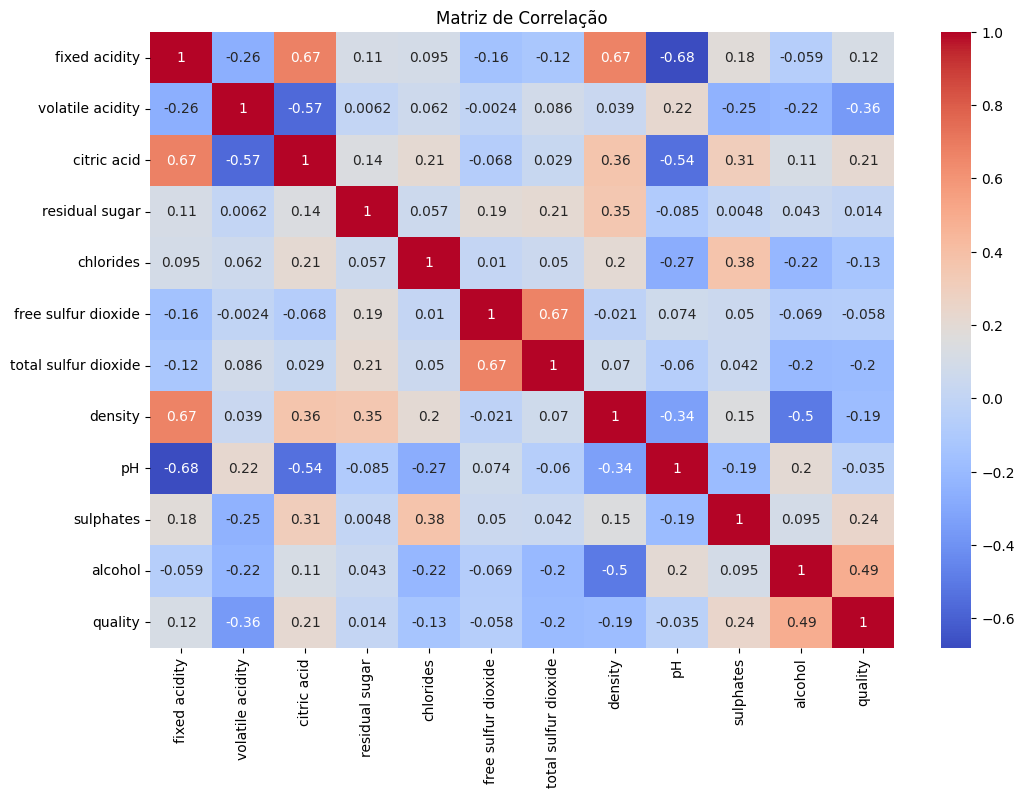

quality                 1.000000
alcohol                 0.492392
sulphates               0.241554
citric acid             0.213606
fixed acidity           0.115706
residual sugar          0.014309
pH                     -0.034778
free sulfur dioxide    -0.057905
chlorides              -0.129588
density                -0.187509
total sulfur dioxide   -0.197810
volatile acidity       -0.363475
Name: quality, dtype: float64


In [13]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

# Correlação com a variável alvo
print(corr['quality'].sort_values(ascending=False))


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

modelos = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

resultados = {}

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    resultados[nome] = {'RMSE': rmse, 'MAE': mae, 'R²': r2}

resultados_df = pd.DataFrame(resultados).T
print(resultados_df)


                       RMSE       MAE        R²
Linear Regression  0.658113  0.510511  0.373059
Random Forest      0.611759  0.433133  0.458265
XGBoost            0.622168  0.422640  0.439673


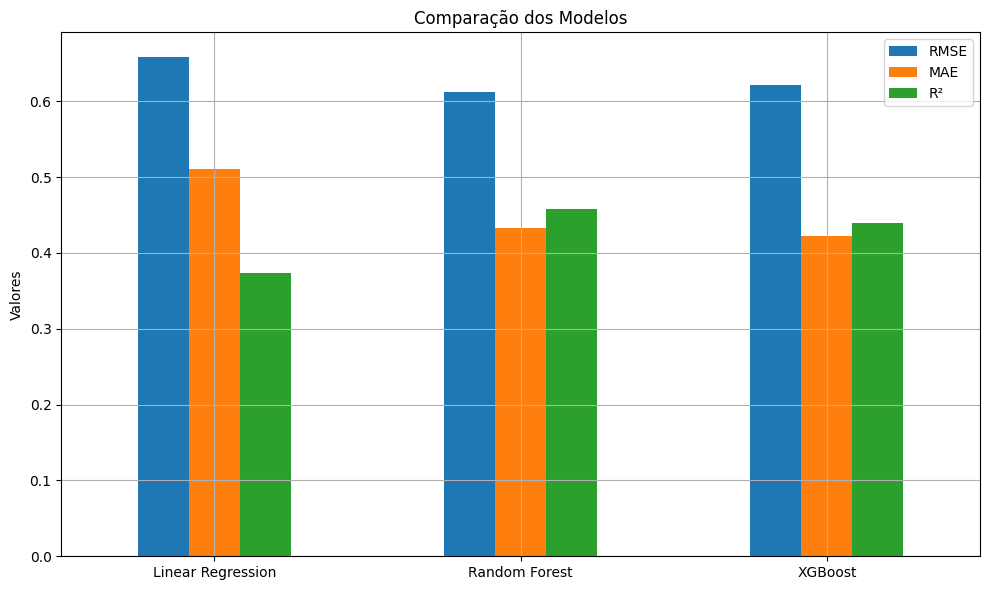

In [15]:
resultados_df.plot(kind='bar', figsize=(10, 6), title="Comparação dos Modelos", rot=0)
plt.ylabel("Valores")
plt.grid(True)
plt.tight_layout()
plt.show()
